<a href="https://colab.research.google.com/github/ahn283/finance/blob/main/dnn_mnist_classifier_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 활용하기



## 실습 목표
-----
- torchvision 데이터 셋을 사용하여 이미지 분류기를 생성한다.
- 생성한 모델을 저장하고, 저장된 모델을 다시 불러와서 사용한다.




## 문제 정의
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성합니다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

- **reference**
    - https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

## 주요 개념 리뷰
----

### 1. TensorDataset과 DataLoader

- 입력 데이터를 쉽게 처리하고, 배치 단위로 잘러서 학습할 수 있게 도와주는 모듈
- **Dataset** : 학습시 사용하는 feature와 target의 pair로 이루어짐 

- **DataLoader**: 학습 시 각 인스턴스에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)를 생성

- **DataLoader가 하는 역할**
    - shuffling
    - batch ...

### 2. Device 설정
- 일반적으로 인공신경망의 학습은 (가능하다면) GPU를 사용하는 것이 바람직함
- GPU를 사용하여 학습을 진행하도록 명시적으로 작성 필요
- 연산 유형에 따라 GPU에서 수행이 불가능한 경우도 존재하는데, 그럴 경우도 마찬가지로 명시적으로 어떤 프로세서에서 연산을 수행해야하는지 코드로 작성해야함


### 3. 신경망 생성

- **torch.nn 패키지**는 신경망 생성 및 학습 시 설정해야하는 다양한 기능을 제공
- 신경망을 **nn.Module**을 상속받아 정의
    - __ __init__ __(): 신경망에서 사용할 layer를 초기화하는 부분
    - __forward()__: feed foward 연산 수행 시, 각 layer의 입출력이 어떻게 연결되는지를 지정


### 4. Model compile

- 학습 시 필요한 정보들(loss function, optimizer)을 선언
- 일반적으로 loss와 optimizer는 아래와 같이 변수로 선언하고, 변수를 train/test 시 참고할 수 있도록 매개변수로 지정해줌 


### 5. Train
- **신경망의 학습과정**을 별도의 함수로 구성하는 것이 일반적
    - feed forward -> loss -> error back propagation -> (log) -> (반복)

### 6. Test

- 학습과정과 비슷하나 error back propagate하는 부분이 없음
    - feed forward -> loss ->  (log) -> (반복)

### 7. Iteration
- 신경망 학습은 여러 epochs을 반복해서 수행하면서 모델을 구성하는 최적의 파라미터를 찾음
- 지정한 epochs 수만큼 **학습**과정과 **평가**과정을 반복하면서, 모델의 성능(loss, accuracy 등)을 체크함

## 주요 코드
----

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현해봅니다.

### [Step1] Load libraries & Datasets

* **[torch.nn](https://pytorch.org/docs/stable/nn.html)** :  신경망을 생성하기 위한 기본 재료들을 제공(Modules, Sequential, Layer, Activations, Loss, Dropout...)
* **[torchvision.datasets](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)** : torchvision.transforms를 사용해 변형이 가능한 형태, feature와 label을 반환
* **[torchvision.transforms](https://tutorials.pytorch.kr/beginner/basics/transforms_tutorial.html)**
    * ToTensor() : ndarray를 FloatTensor로 변환하고 이미지 픽셀 크기를 [0., 1.]범위로 조정(scale)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [22]:
# Load FashionMNIST 
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

### [Step2] Create DataLoader

In [23]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [24]:
# Device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

device = cpu


#### EDA

In [25]:
print(training_data, '\n------------------\n', test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 
------------------
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [26]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [27]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Features batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

Features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


label=9


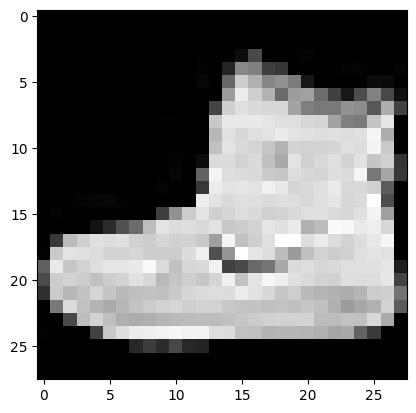

In [28]:
img, label = training_data[0]
plt.imshow(img.squeeze(), cmap='gray')
print(f'label={label}')

In [29]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

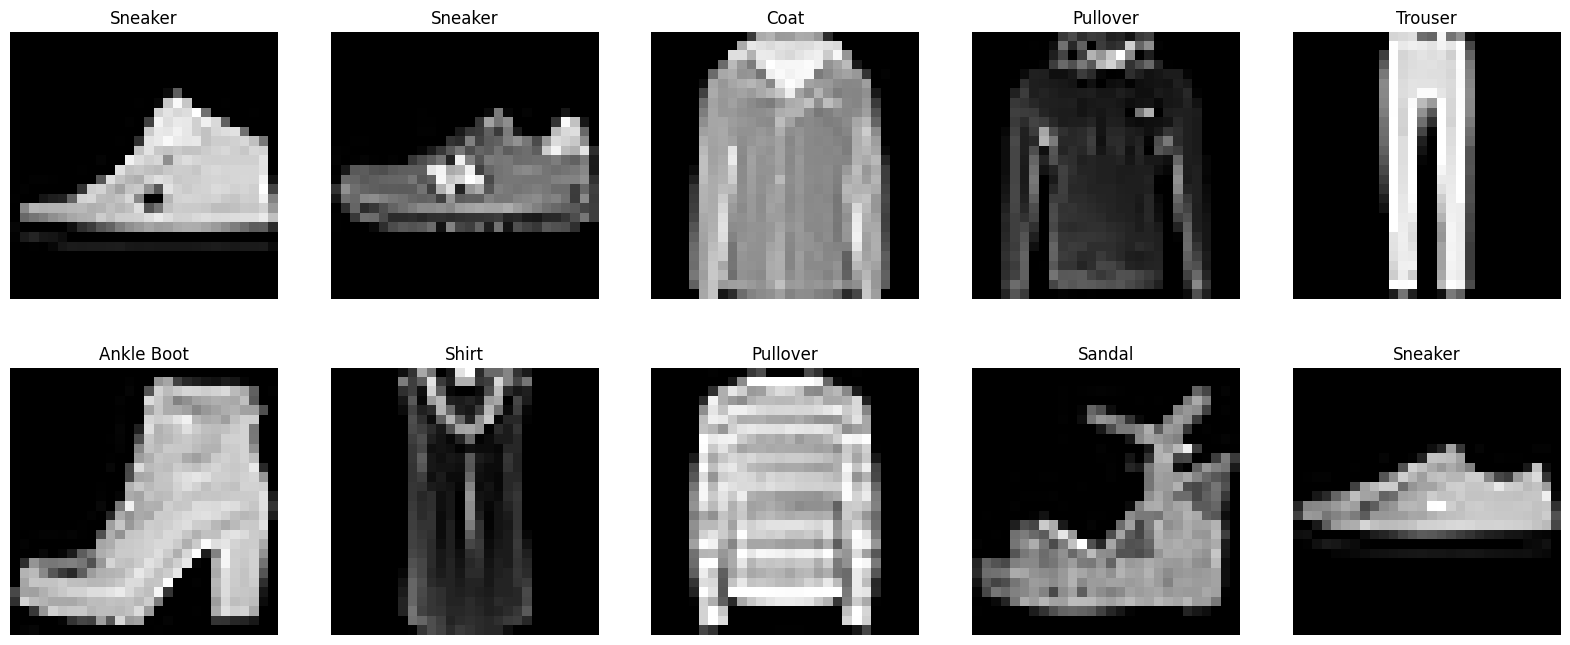

In [30]:
figure = plt.figure(figsize=(20, 8))
cols, rows = 5, 2

for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### [Step3] Set Network Structure

In [31]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        output = self.classifier(x)
        return output

### [Step4] Create Model instance

In [32]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


#### Model 테스트

In [33]:
X = torch.rand(1, 28, 28, device=device)
output = model(X)
print(f'모델 출력 결과: {output}\n')
pred_probab = nn.Softmax(dim=1)(output)
print(f'Softmax 결과: {pred_probab}\n')
y_pred = pred_probab.argmax()
print(y_pred)

모델 출력 결과: tensor([[ 0.0381, -0.0404,  0.1780, -0.3785,  0.1041,  0.0092,  0.3636,  0.4447,
         -0.1704, -0.1233]], grad_fn=<AddmmBackward0>)

Softmax 결과: tensor([[0.0969, 0.0896, 0.1114, 0.0639, 0.1035, 0.0941, 0.1341, 0.1455, 0.0786,
         0.0824]], grad_fn=<SoftmaxBackward0>)

tensor(7)


### [Step5] Model compile

In [34]:
# Loss
loss = nn.CrossEntropyLoss()
# Optimizer
learning_rate = 1e-3 # 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### [Step6] Set train loop

In [40]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        # calculate loss
        loss = loss_fn(pred, y)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f} [{current:>5d}]/{size:5d}')


### [Step7] Set test loop

In [36]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n')

### [Step8] Run model

In [41]:
epochs = 10

for i in range(epochs):
    print(f'Epoch {i+1} \n-------------------')
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print('Done!')

Epoch 1 
-------------------
loss: 2.213899 [    0]/60000
loss: 0.699754 [ 6400]/60000
loss: 0.693760 [12800]/60000
loss: 0.695999 [19200]/60000
loss: 0.493239 [25600]/60000
loss: 0.367082 [32000]/60000
loss: 0.380697 [38400]/60000
loss: 0.548773 [44800]/60000
loss: 0.505715 [51200]/60000
loss: 0.498962 [57600]/60000
Test Error: 
 Accuracy: 83.2%, Avg loss: 0.477590

Epoch 2 
-------------------
loss: 0.386653 [    0]/60000
loss: 0.357295 [ 6400]/60000
loss: 0.324432 [12800]/60000
loss: 0.456991 [19200]/60000
loss: 0.353846 [25600]/60000
loss: 0.401081 [32000]/60000
loss: 0.375421 [38400]/60000
loss: 0.541667 [44800]/60000
loss: 0.340795 [51200]/60000
loss: 0.327567 [57600]/60000
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.429137

Epoch 3 
-------------------
loss: 0.410395 [    0]/60000
loss: 0.402404 [ 6400]/60000
loss: 0.359744 [12800]/60000
loss: 0.421346 [19200]/60000
loss: 0.485447 [25600]/60000
loss: 0.321886 [32000]/60000
loss: 0.254686 [38400]/60000
loss: 0.369623 [44800]/60000

### [Step9] Save & load model

#### parameter만 저장하고 불러오기

In [42]:
torch.save(model.state_dict(), 'model_weight.pth')

In [43]:
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [44]:
model2.load_state_dict(torch.load('model_weight.pth'))

<All keys matched successfully>

In [45]:
model2.eval()
test_loop(test_dataloader, model2, loss)

Test Error: 
 Accuracy: 88.1%, Avg loss: 0.338816



#### Model 전체를 저장하고 불러오기

In [46]:
torch.save(model, 'model.pth')

In [47]:
model3 = torch.load('model.pth')

In [48]:
model.eval()
test_loop(test_dataloader, model3, loss)

Test Error: 
 Accuracy: 86.8%, Avg loss: 0.366086

